In [18]:
import pandas as pd
import sklearn.preprocessing as skp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# TITLE HERE

## To Add: INTRO, OBJECTIVE, Explain meaning of dataset columns

## Data Retrieval

In [24]:
df = pd.read_csv('heart.csv')
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data Exploration

1. Check data type of each column and total number of rows

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


2. Checking for null values in the dataset

In [26]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Checking for Outliers
Using visualization to identify outliers, then modifying dataframe accordingly

### 1. Handling Cholesterol Outliers

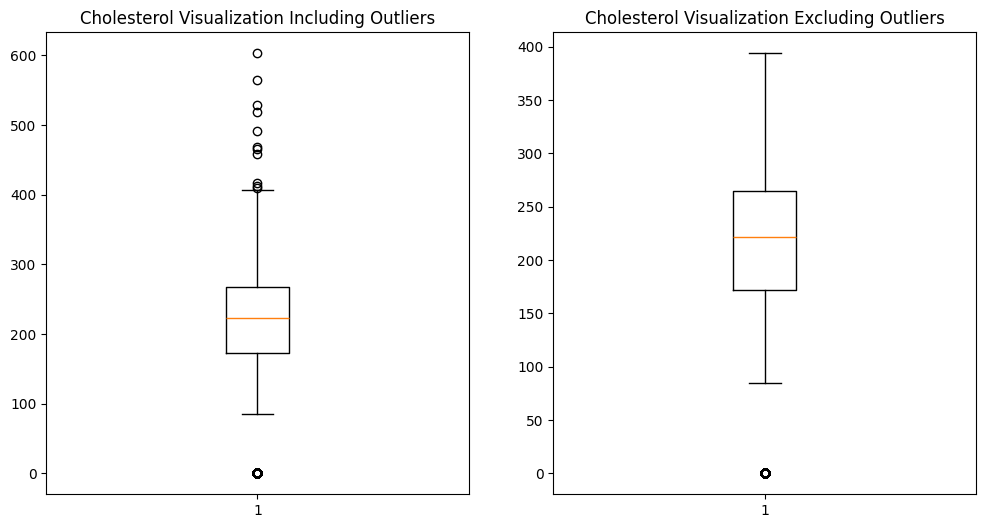

In [27]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(6)

axes[0].boxplot(data=df, x='Cholesterol')
axes[0].set_title('Cholesterol Visualization Including Outliers')

axes[1].boxplot(df[(df.Cholesterol<400)]['Cholesterol'])
axes[1].set_title('Cholesterol Visualization Excluding Outliers');

#### Decision: Will remove cholestrol levels that are greater than 400. We will fill the missing cholesterol (cholesterol == 0) with median cholesterol.

### 2. Checking Resting Blood Pressure for Outliers

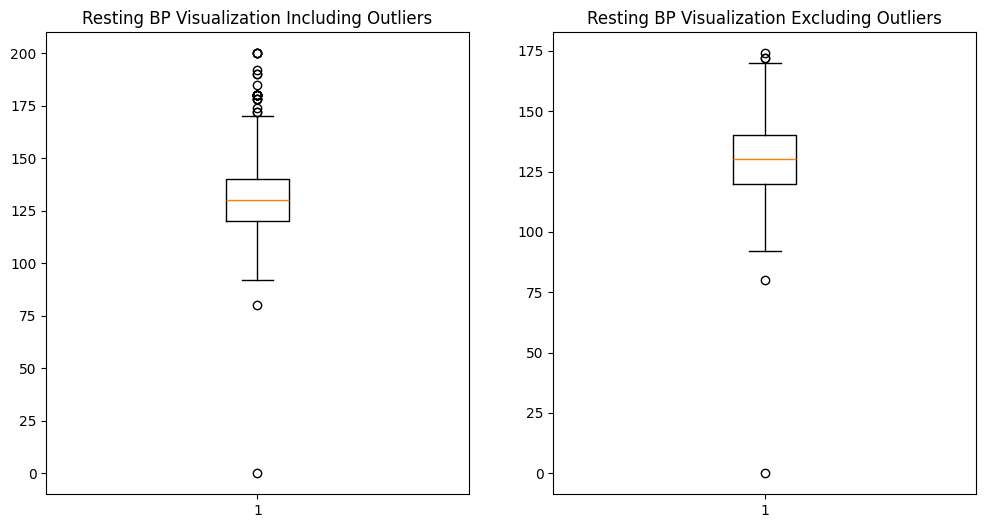

In [29]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(6)

axes[0].boxplot(data=df, x='RestingBP')
axes[0].set_title('Resting BP Visualization Including Outliers')

axes[1].boxplot(df[df.RestingBP<175]['RestingBP'])  # SHOULD BE df.RestingBP<180?
axes[1].set_title('Resting BP Visualization Excluding Outliers');

#### Decision: To discuss...

### 3. Checking Max Heart Rate for Outliers

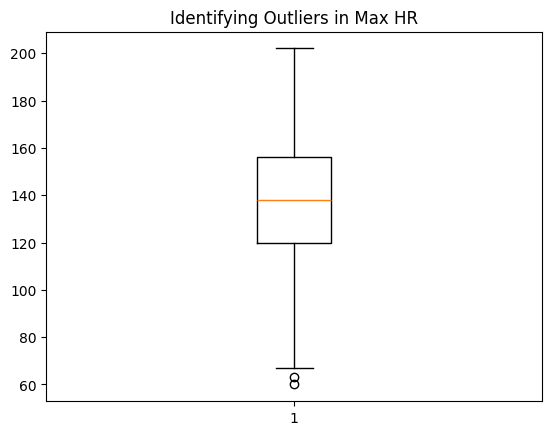

In [31]:
plt.boxplot(df.MaxHR) 
plt.title('Identifying Outliers in Max HR');

### 4. Distribution of ChestPainTypes

#### Decision: Since the boxplot does not have many outliers and heart rates between 60 and 70 is within reasonable range for adults, so we will keep these data.

## Pre-processing

### Handling Missing Values

1. Replace missing cholesterol values (Cholesterol == 0) with median cholesterol value

In [9]:
c=df['Cholesterol']
c_median=c[c>0].median()
df['Cholesterol']=df['Cholesterol'].replace(0,c_median)

2. Replace missing resting blood pressure value (RestingBP == 0) with median resting blood pressure value 

In [10]:
rbp_median=df[df.RestingBP!=0]['RestingBP'].median() 
df['RestingBP']=df['RestingBP'].replace(0,rbp_median)

### Data Binning
1. Using MaxHR to create a new categorical column

In [11]:
df['MaxHR Level'] = skp.KBinsDiscretizer(n_bins=5, encode='ordinal').fit_transform(df['MaxHR'].values.reshape(-1, 1))

In [12]:
df['MaxHR Level'].replace(0, 'Low', inplace=True)
df['MaxHR Level'].replace(1, 'Low-Mid', inplace=True)
df['MaxHR Level'].replace(2, 'Mid', inplace=True)
df['MaxHR Level'].replace(3, 'Mid-High', inplace=True)
df['MaxHR Level'].replace(4, 'High', inplace=True)

In [13]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,MaxHR Level
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,High
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Mid-High
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Low
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Low
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Low-Mid


2. For HeartDisease column, map 0 to 'no' and 1 to 'yes'.

In [14]:
df['HeartDisease']=df['HeartDisease'].replace(0,'no')
df['HeartDisease']=df['HeartDisease'].replace(1,'yes')

### Normalization

In [15]:
# NORMALIZATION IS USEFUL FOR DOING KMEANS
# CAN ADD WHEN WE GET UP TO THE MACHINE LEARNING SECTION

## Analysis

### Statistics

In [19]:
stats.describe(df['Cholesterol'])

DescribeResult(nobs=905, minmax=(85, 394), mean=239.7171270718232, variance=2068.776089082286, skewness=0.31538942439313655, kurtosis=0.9036611186090155)

In [20]:
df[['RestingBP','HeartDisease']].groupby('HeartDisease').agg('mean')

,RestingBP
HeartDisease,
no,129.175309
yes,132.742000


In [21]:
df.pivot_table(index='HeartDisease', columns='Sex', values='RestingBP', aggfunc='mean')

Sex,F,M
HeartDisease,,
no,127.85,129.875472
yes,136.00,132.396018


In [22]:
df.pivot_table(index='HeartDisease', columns='Sex', values='RestingBP', aggfunc='median')

Sex,F,M
HeartDisease,,
no,130.0,130.0
yes,133.5,130.0


## Visualizations

### Examining Maximum Heart Rate (Max HR)
#### We will construct a pie chart to look at the different levels of maximum heart rate
There are 5 levels: Low, Mid-Low, Mid, High-Mid, High. We will look at the prevelance of each level in the dataset by seeing the percentages.

In [ ]:
level_count = df.groupby('MaxHR Level').agg('size')
plt.pie(labels=level_count.index, x=level_count.values, autopct='%1.1f%%')
plt.title('Maximum Heart Rate Division');

#### We will construct a FacetGrid to look at the maximum heart rates between males and females

In [ ]:
sns.FacetGrid(data=df, col='MaxHR Level', row='Sex').map(plt.scatter, 'Age', 'MaxHR');

#### We will construct a barplot to look at the relationship between Max HR and Cholesterol

In [ ]:
plt.figure(figsize=(12, 6))
bar = sns.barplot(data=df, x='MaxHR', y='Cholesterol', hue='MaxHR Level')
bar.set_xlabel('Max HR')
bar.set_ylabel('Cholesterol')
bar.set_title('Visualizing the Correlation Between Max HR and Cholesterol')
bar.legend(bbox_to_anchor=(1.03, 1))

tick_labels = bar.get_xticklabels() 
for i, label in enumerate(tick_labels):
    if i % 5 != 0: label.set_visible(False)

plt.show();

1. Show relationships between male/female, age groups, heart disease.  e.g. For male w/ HD, age group distribution/percentage,  For female w/ HD, age group distribution. Insight, at what age range, is HD more likely to occur between male vs. female

2. Show relationships between Oldpeak, ST_Slope, heart disease --> help doctors utilize ST Depression curve to predict Heart Disease